# **Netflix Data Cleaning, Analysis, and Visualization**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Display plots inline
%matplotlib inline

# Set plot styles
sns.set(style="whitegrid")


In [10]:
import pandas as pd

# Load the dataset again
data = pd.read_csv('/content/netflix1.csv')

# Check the first few rows to confirm it's loaded
data.head()


show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dramas, TV Horror, TV Mysteries  
3                 Children & Family Movies, Comedies  
4   Dramas, Independent Movies, International Movies

In [ ]:
# Load the dataset
data = pd.read_csv('/content/netflix1.csv')

# Show the first few rows
data.head()


show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dramas, TV Horror, TV Mysteries  
3                 Children & Family Movies, Comedies  
4   Dramas, Independent Movies, International Movies

## ##Dataset Structure

In [ ]:
print("Shape of the dataset:", data.shape)


Shape of the dataset: (8790, 10)


In [ ]:
print("Column names:")
print(data.columns.tolist())


Column names:
['show_id', 'type', 'title', 'director', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in']


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [ ]:
print("Missing values in each column:")
print(data.isnull().sum())


Missing values in each column:
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [ ]:
data.head()  # first 5 rows


show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dramas, TV Horror, TV Mysteries  
3                 Children & Family Movies, Comedies  
4   Dramas, Independent Movies, International Movies

In [ ]:
data.tail()  # last 5 rows


show_id     type               title   director        country  \
8785   s8797  TV Show          Yunus Emre  Not Given         Turkey   
8786   s8798  TV Show           Zak Storm  Not Given  United States   
8787   s8801  TV Show  Zindagi Gulzar Hai  Not Given       Pakistan   
8788   s8784  TV Show                Yoko  Not Given       Pakistan   
8789   s8786  TV Show                 YOM  Not Given       Pakistan   

      date_added  release_year rating   duration  \
8785   1/17/2017          2016  TV-PG  2 Seasons   
8786   9/13/2018          2016  TV-Y7  3 Seasons   
8787  12/15/2016          2012  TV-PG   1 Season   
8788   6/23/2018          2016   TV-Y   1 Season   
8789    6/7/2018          2016  TV-Y7   1 Season   

                                              listed_in  
8785                  International TV Shows, TV Dramas  
8786                                           Kids' TV  
8787  International TV Shows, Romantic TV Shows, TV ...  
8788                                           Kids' TV  
8789                                           Kids' TV

# ##Data Cleaning

In [ ]:
# Remove duplicate rows
data = data.drop_duplicates()

# Confirm the shape after removing duplicates
print("Shape after removing duplicates:", data.shape)


Shape after removing duplicates: (8790, 10)


In [11]:
# Drop duplicates
data = data.drop_duplicates()

# Drop rows with missing values in key columns
data = data.dropna(subset=['director', 'country'])

# Convert date_added to datetime
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

# Extract date parts
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month
data['day_added'] = data['date_added'].dt.day

# Extract numeric duration
data['duration_num'] = data['duration'].str.extract('(\d+)').astype(float)


In [ ]:
# Drop rows with missing values in key columns
data = data.dropna(subset=['director', 'country'])

# Confirm nulls again
print("Missing values after cleaning:")
print(data.isnull().sum())


Missing values after cleaning:
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [ ]:
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

# Check if conversion worked
print(data['date_added'].dtype)


datetime64[ns]


In [ ]:
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month
data['day_added'] = data['date_added'].dt.day


In [ ]:
# Create a new column with numeric duration
data['duration_num'] = data['duration'].str.extract('(\d+)').astype(float)

# Check first few values
data[['duration', 'duration_num']].head()


duration  duration_num
0    90 min          90.0
1  1 Season           1.0
2  1 Season           1.0
3    91 min          91.0
4   125 min         125.0

##Exploratory Data Analysis (EDA)

EDA 1: Content Type Distribution (Movies vs TV Shows)

In [15]:
# EDA 1: Content Type Distribution
type_counts = data['type'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


<ipython-input-15-55a46a99a9f0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')


EDA 2: Ratings Distribution

In [16]:
# Count of each rating type
rating_counts = data['rating'].value_counts()

# Bar Plot of Ratings
plt.figure(figsize=(10, 5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='muted')
plt.xticks(rotation=45)
plt.title('Distribution of Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


<ipython-input-16-a114d9b7120b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='muted')


EDA 3: Top Genres

In [17]:
# Split genres and flatten the list
data['genres'] = data['listed_in'].apply(lambda x: x.split(', '))
all_genres = sum(data['genres'], [])  # flatten list

# Count top genres
genre_counts = pd.Series(all_genres).value_counts().head(10)

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='coolwarm')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


<ipython-input-17-99246526e5e3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='coolwarm')


EDA 4: Content Added Over Time (Year)

In [18]:
# Plot by year
plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=data, palette='viridis')
plt.title('Content Added Each Year on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<ipython-input-18-a052ba0eea84>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added', data=data, palette='viridis')


EDA 5: Top 10 Countries with Most Content

In [19]:
# Count top countries
top_countries = data['country'].value_counts().head(10)

# Bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='cubehelix')
plt.title('Top 10 Countries by Number of Netflix Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


<ipython-input-19-64ae57ca4aa4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='cubehelix')


EDA 6: Top 10 Directors

<ipython-input-20-65e2c36405bc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='pastel')


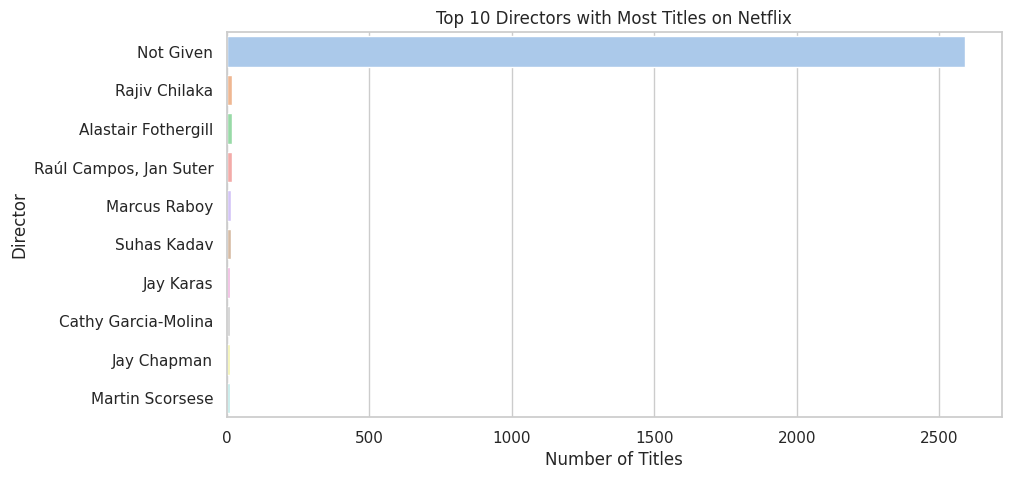

In [20]:
# Count directors
top_directors = data['director'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='pastel')
plt.title('Top 10 Directors with Most Titles on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


EDA 7: Word Cloud of Movie Titles

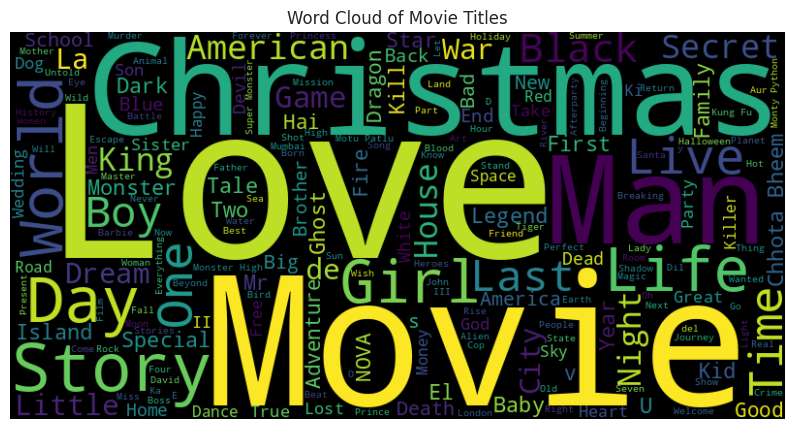

In [21]:
# Word cloud for movie titles
movie_titles = data[data['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))

# Plot Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles')
plt.show()
